# Particle Tracking using Local Maxima

This notebook identifies and tracks particles in image sequences. We use local maxima detection on TIFF files and track particles across frames.

In [2]:
import math
import os
from skimage.filters import threshold_otsu
import pandas as pd
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import trackpy as tp
from pathlib import Path

# Configure matplotlib for inline plotting and set seaborn style
%matplotlib inline
sns.set(style="darkgrid")

In [8]:
movie = 'E565'
DATA_PATH = Path(r'D:\amityu\2d_drop_ data\\')

# Define directories for input and output
MOVIE_PATH = DATA_PATH / movie / 'tif'
output_maxima_dir = DATA_PATH / f'{movie}_local'
output_dir = DATA_PATH / f'{movie}_clip'

# List files and take a subset
files = sorted(MOVIE_PATH.glob('*.tif'))[:20]  # Select first 1800 TIFF files


In [9]:
def load_tiff_image(filepath):
    """Load a TIFF file using tifffile."""
    return tifffile.imread(filepath)

def identify_local_maxima(image):
    """Identify particles by finding local maxima."""
    threshold = threshold_otsu(image)
    binary_image = image > threshold
    # Implement local maxima detection here
    # For now, returning a mock-up for the process
    return tp.locate(binary_image, diameter=11)  # Example for particle location

def track_particles(frames):
    """Track particles across multiple frames."""
    return tp.link(frames, search_range=5)


In [11]:
results = []  # Store results here

for i, file in tqdm(enumerate(files), desc="Processing TIFF files"):
    # Load image
    image = load_tiff_image(file)

    # Identify particles (local maxima)
    particles = identify_local_maxima(image)
    # Add the frame number to the particles DataFrame
    particles['frame'] = i
    # Append results (e.g., particle positions)
    results.append(particles)

# After processing all images, link the particles into tracks
trajectories = track_particles(pd.concat(results))


Frame 19: 254 trajectories present.


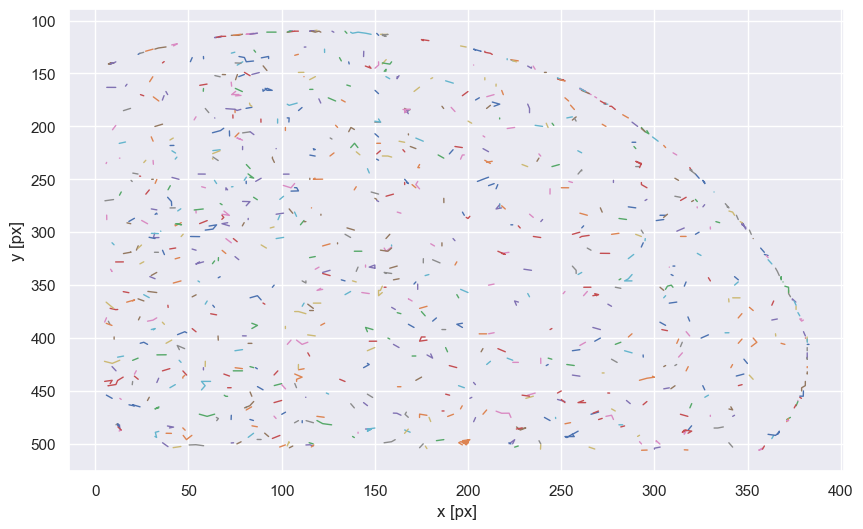

In [13]:
def plot_trajectories(trajectories):
    """Plot particle trajectories."""
    plt.figure(figsize=(10, 6))
    tp.plot_traj(trajectories)
    
plot_trajectories(trajectories)


In [15]:
# Ensure the directory exists
output_maxima_dir.mkdir(parents=True, exist_ok=True)

# Define the output file path
output_file = output_maxima_dir / f"{movie}_trajectories.csv"

# Save the trajectories to CSV
trajectories.to_csv(output_file, index=False)



## Summary

In this notebook, we identified and tracked particles in image sequences using local maxima detection. The trajectories were plotted and saved for further analysis. Future work may involve refining the local maxima detection method and exploring different tracking parameters.
